In [180]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.abspath('../'))

from data_loader import DataLoader
from model_building import LoadDataForML


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
# Global Variables
foldername = "..\\..\\data\\processed"
x_file = 'X_data_processed.csv'
y_file = 'y_data_processed.csv'
folder_to_save_model = "..\\..\\models\\"

In [182]:
# Create an instance of DataLoader and load the training data.
x_data_loader = DataLoader(folder_name=foldername, filename=x_file)
X_data = x_data_loader.load_data()
X_data.head()

The original dataframe has this number of columns: 10 and rows: 20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_ratio
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,3,0.136793
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,3,0.144790
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,3,0.121789
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,3,0.169286
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,3,0.158793


In [183]:
y_data_loader = DataLoader(folder_name=foldername, filename=y_file)
y_data = y_data_loader.load_data()
y_data.squeeze()  # To convert data to series. 

The original dataframe has this number of columns: 1 and rows: 20640


0        13.022764
1        12.789684
2        12.771671
3        12.740517
4        12.743151
           ...    
20635    11.265745
20636    11.252859
20637    11.432799
20638    11.346871
20639    11.400876
Name: median_house_value, Length: 20640, dtype: float64

##### Creating the Train test sets

X Training set size: 16512
X Test set size: 4128
y train set size: 16512
y Test set size: 4128

Results:
Linear Regression: RMSE = 0.3610104142242708, R-squared = 0.5984527895646269


c:\Users\CamiloA\OneDrive\Documents\Python Scripts\cali_housing_api\.venv-cali_predictor\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest: RMSE = 0.2337561053162421, R-squared = 0.8316461401448464
CatBoost: RMSE = 0.22055545953248173, R-squared = 0.850123764015416
XGBoost: RMSE = 0.23215147603571723, R-squared = 0.8339495658874512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2098
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 10
[LightGBM] [Info] Start training from score 12.086494
LightGBM: RMSE = 0.2320315442458731, R-squared = 0.8341210745879376


c:\Users\CamiloA\OneDrive\Documents\Python Scripts\cali_housing_api\.venv-cali_predictor\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting: RMSE = 0.2682409872075119, R-squared = 0.7783093228298736


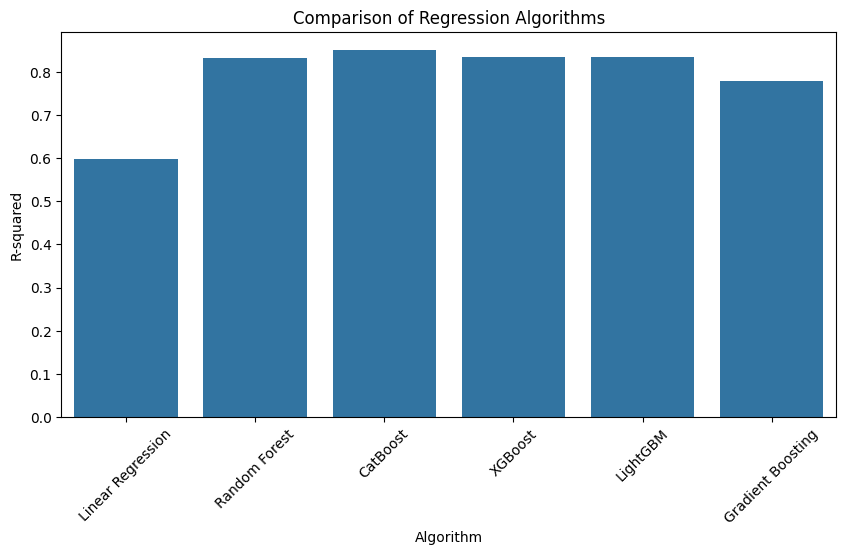

In [184]:
model_builder = LoadDataForML(folder_to_save_model=folder_to_save_model, random_state=42, test_size=0.2)
X_train, X_test, y_train, y_test = model_builder.create_train_test_split(X=X_data, y=y_data)

# This instance will test several models and plot the R2 ^ RMSE
predictions, y_test, scores = model_builder.model_tester(X_train, y_train, X_test, y_test)

In [185]:
y_test_exp, ensemble_preds_exp = model_builder.ensemble_selecting(predictions, y_test, scores)

Selected models for ensemble: ['Random Forest', 'CatBoost', 'XGBoost', 'LightGBM']

Averaging Ensemble: RMSE = 46980.00537911255, R-squared = 0.8315700714761359


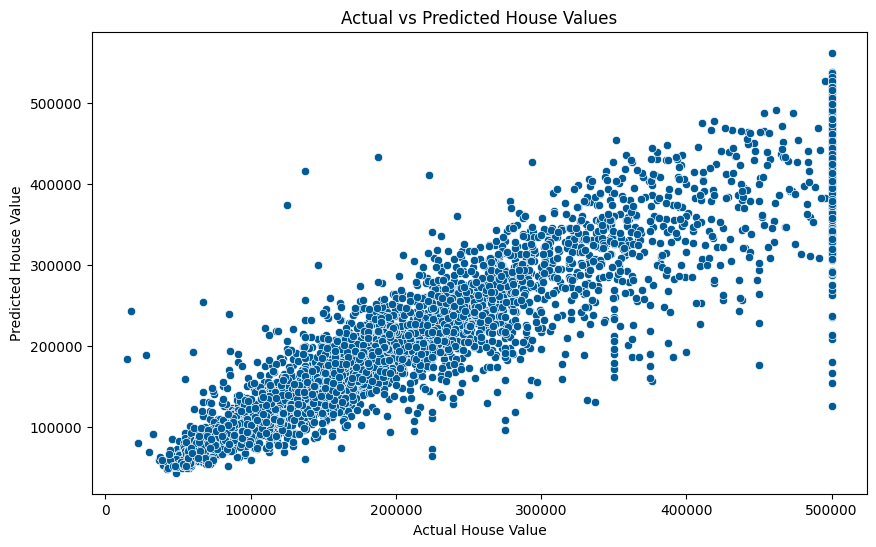

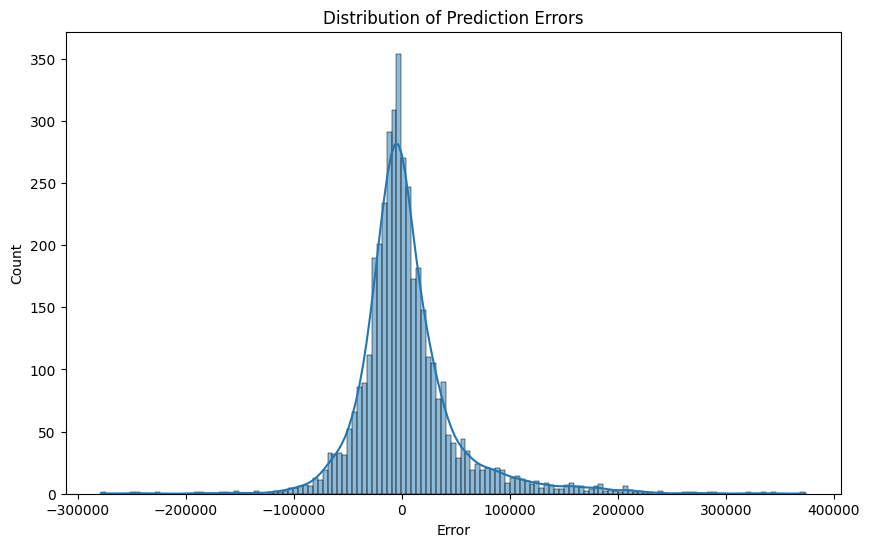

,Actual,Predicted
20046,47700.0,53740.33
3024,45800.0,84624.56
15663,500001.0,498634.99
20484,218600.0,253441.82
9814,278000.0,262985.45
...,...,...
15362,263300.0,232145.05
16623,266800.0,224909.59
18086,500001.0,498790.92
2144,72300.0,74303.93


In [186]:
model_builder.plot_predictions_vs_actual(y_test_exp=y_test_exp, ensemble_preds_exp=ensemble_preds_exp)